In [2]:
import pandas as pd
from lxml import etree
import os
from matplotlib import pyplot as plt

In [6]:
def mrt2df(file_name:str):
    tree = etree.parse(file_name)
    root = tree.getroot()
    transcript = root[1]
    data = []
    for i in transcript:
        data.append({
            "start":i.get("StartTime"),
            "end":i.get("EndTime"),
            "participant":i.get("Participant"),
            "text":i.text.strip()
        })
    data_df = pd.DataFrame(data)
    return data_df
    
    

In [8]:
mrt_files = os.listdir("./transcripts/mrts")
Bfiles = [ "transcripts/mrts/"+i for i in mrt_files if i.endswith(".mrt") and i.startswith("B")]
print(f"We have {len(Bfiles)} .mrt files")

We have 75 .mrt files


In [9]:
Bfiles[0]

'transcripts/mrts/Bro010.mrt'

In [10]:
for file in Bfiles:
    df = mrt2df(file)
    df.to_csv(file.replace(".mrt",".clean.csv"),index=False)
    # print(f"{file} has {len(df)} rows and {len(df['participant'].unique())} unique participants")

In [20]:
N = 0 # to 75 excluded
df = mrt2df(Bfiles[N])
df

,start,end,participant,text
0,4.943,6.672,me018,"\n O_K, we're on."
1,8.536,14.800,me013,\n
2,13.770,16.957,me006,\n
3,14.643,15.650,fn002,\n
4,15.130,16.210,me013,\n
...,...,...,...,...
1092,2894.340,2897.160,me013,"\n Yeah, yeah, I'll do my credit card num..."
1093,2894.606,2895.288,fn002,\n
1094,2896.970,2898.731,me006,\n
1095,2897.580,2898.433,fn002,\n


In [208]:
files = os.listdir("./transcripts/csvs")

In [ ]:
for file in files:
    df = pd.read_csv("transcripts/csvs/"+file)
    df.astype({'start': 'float64', 'end': 'float64','participant': 'str', 'text': 'str'})
    participants = df["participant"].unique().tolist()
    fig, ax = plt.subplots()
    colors = ['C{}'.format(i) for i in range(len(participants))]
    for i,participant in enumerate(participants):
        data = df[df["participant"] == participant]
        times = zip(data["start"], data["end"] - data["start"])
        xrange = list(times) 
        ax.broken_barh(xrange, (10*(i+1), 9), facecolors=colors[i])
    ax.set_xlabel('seconds since start')
    ax.set_yticks([10*(i+1) for i in range(len(participants))] )
    ax.set_yticklabels(labels=participants) 
    plt.savefig(f'transcripts/imgs/{file}.png',dpi=300)


In [221]:
imgs = os.listdir("./transcripts/imgs")

In [225]:
t = set()

In [226]:
for i in imgs:
    t.add(i.split(".")[0][:3])

In [228]:
t = list(t)

In [231]:
t.sort()

In [232]:
for i in t:
    print(r"\section{%s}"%i)

\section{Bdb}
\section{Bed}
\section{Bmr}
\section{Bns}
\section{Bro}
\section{Bsr}
\section{Btr}
\section{Buw}


In [233]:
a = """\begin{figure}[h]
\centering
\includegraphics{Buw001.csv.png}
\caption{Buw001}
\label{fig:x cubed graph}
\end{figure}"""

In [242]:
len(imgs)

75

In [245]:
groups = {}

for i in imgs:
    groups[i.split(".")[0][:3]] = groups.get(i.split(".")[0][:3], []) + [i]

In [269]:
# break an array into chunks of size n
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [2]:
files = os.listdir("./transcripts/csvs")
df = pd.read_csv("transcripts/csvs/"+files[0])
df.astype({'start': 'float64', 'end': 'float64','participant': 'str', 'text': 'str'})
participants = df["participant"].unique().tolist()

In [4]:
df["text"].describe()

count            3212
unique           1656
top       b'\n      '
freq              632
Name: text, dtype: object

In [18]:
df = pd.read_csv("transcripts/csvs/"+files[35])
df.astype({'start': 'float64', 'end': 'float64','participant': 'str', 'text': 'str'})
participants = df["participant"].unique().tolist()
df['text_length'] = df.text.str.split().str.len()
df["text_length"].describe()
df_clean = df[df["text_length"] > 2]
df_clean["text_length"].describe()


count    1024.000000
mean        9.226562
std         6.843127
min         3.000000
25%         4.000000
50%         7.000000
75%        13.000000
max        38.000000
Name: text_length, dtype: float64

In [19]:
df

,start,end,participant,text,text_length
0,0.000,3.956,me018,b'\n ',2
1,0.056,1.861,me011,"b'\n Yeah, we had a long discussion about...",9
2,2.674,6.315,me011,b'\n how much w- how easy we want to make...,20
3,5.100,7.881,me018,b'\n ',2
4,6.260,6.864,fe016,b'\n Right.\n ',3
...,...,...,...,...,...
1393,3014.981,3016.774,me001,b'\n six two six two six ',7
1394,3015.158,3015.447,mn017,b'\n ',2
1395,3016.774,3018.760,me001,"b'\n seven three, zero one. '",6
1396,3020.243,3021.371,me001,b'\n ',2


In [7]:
df_clean = df[df["text_length"] > 2]

In [9]:
df_clean["text_length"].describe()

count    2577.000000
mean        7.848273
std         7.115007
min         3.000000
25%         3.000000
50%         5.000000
75%        10.000000
max        53.000000
Name: text_length, dtype: float64

In [13]:
df

,start,end,participant,text,text_length
0,0.000,0.320,me001,b'\n st- ',3
1,0.537,1.002,me001,b'\n Yeah. ',3
2,1.030,2.072,me011,"b""\n So we're on. """,5
3,1.322,1.903,me001,"b""\n That's better. """,4
4,3.131,3.534,mn014,b'\n ',2
...,...,...,...,...,...
2647,3104.028,3104.246,me011,b'\n ',2
2648,3104.089,3105.591,me013,b'\n ',2
2649,3105.364,3105.713,me011,b'\n ',2
2650,3106.307,3108.660,me001,b'\n ',2


In [24]:
pcount = pd.read_csv("transcripts/participantcounts.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1593327c0>]],
      dtype=object)

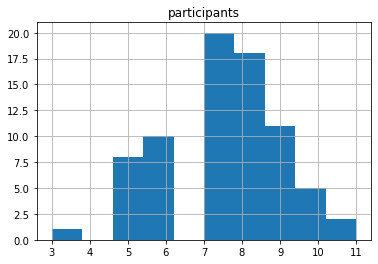

In [29]:
# plot histogram of participant counts for each group
pcount.hist(column="participants")

In [34]:
pcount["group"] = pcount["code"].str[:3]

In [39]:
pcount.groupby("group").participants.describe().sort_values("count", ascending=False)

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
Bmr,29.0,7.827586,1.605103,3.0,7.0,8.0,9.0,10.0
Bro,23.0,6.695652,1.395929,5.0,5.5,7.0,8.0,9.0
Bed,15.0,7.266667,1.387015,5.0,6.5,7.0,8.0,11.0
Bns,3.0,8.000000,1.000000,7.0,7.5,8.0,8.5,9.0
Btr,2.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
Bdb,1.0,7.000000,NaN,7.0,7.0,7.0,7.0,7.0
Bsr,1.0,10.000000,NaN,10.0,10.0,10.0,10.0,10.0
Buw,1.0,11.000000,NaN,11.0,11.0,11.0,11.0,11.0


In [41]:
pcount.groupby("group").rows.describe().sort_values("count", ascending=False)

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
Bmr,29.0,1855.241379,547.338603,884.0,1422.00,1901.0,2224.00,2840.0
Bro,23.0,1453.608696,465.113646,414.0,1151.00,1488.0,1828.50,2236.0
Bed,15.0,1526.666667,329.423017,891.0,1278.00,1595.0,1841.00,1914.0
Bns,3.0,2251.666667,319.133723,1896.0,2121.00,2346.0,2429.50,2513.0
Btr,2.0,3167.500000,62.932504,3123.0,3145.25,3167.5,3189.75,3212.0
Bdb,1.0,1398.000000,NaN,1398.0,1398.00,1398.0,1398.00,1398.0
Bsr,1.0,2757.000000,NaN,2757.0,2757.00,2757.0,2757.00,2757.0
Buw,1.0,2433.000000,NaN,2433.0,2433.00,2433.0,2433.00,2433.0


In [50]:
# show participant and text
df[["participant","text"]].head(20)

,participant,text
0,me018,b'\n '
1,me011,"b'\n Yeah, we had a long discussion about..."
2,me011,b'\n how much w- how easy we want to make...
3,me018,b'\n '
4,fe016,b'\n Right.\n '
5,me011,b'\n '
6,fe016,b'\n O_K. So this is -\n '
7,me011,b'\n Morgan wants to make it hard. '
8,me018,b'\n '
9,fe016,"b'\n The, uh, counter is not '"
